In [2]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.argv=['']
del sys
os.chdir("../")


In [3]:
import matplotlib.pyplot as plt
import json
import math
import torch
import numpy
import pandas
import logging
import numpy as np
from tslearn.metrics import dtw

from IPython import embed
from common import scikit_wrappers, data_preprocess 
from common.utils import print_to_json
from common.dataloader import load_SMD_dataset, load_CSV_dataset, load_SMAP_MSL_dataset
from common.sliding import BatchSlidingWindow, WindowIterator
from common.config import parse_arguments, set_logger, initialize_config


args = parse_arguments()

%matplotlib inline

In [4]:
# load config
config_dir = "./hypers/" if not args["load"] else args["load"]
params = initialize_config(config_dir, args)

# load & preprocess data
data_dict = load_SMAP_MSL_dataset(params["path"], params["dataset"])

In [5]:
print(data_dict["SMAP"]["test"].shape)
print(data_dict["SMAP"]["test_label"].shape)

(427617, 25)
(427617,)


In [1]:
from alibi_detect.od import SpectralResidual

No threshold level set. Need to infer threshold using `infer_threshold`.


In [126]:
od = SpectralResidual(
    threshold=None,  # threshold for outlier score
    window_amp=20,   # window for the average log amplitude
    window_local=20, # window for the average saliency map
    n_est_points=20  # nb of estimated points padded to the end of the sequence
)

2020-11-18 17:33:56,236 P57109 WARNING No threshold level set. Need to infer threshold using `infer_threshold`.


In [7]:
data_dict["SMAP"]["test_label"].sum() / 427617

0.12790885301566587

In [121]:
x = data_dict["SMAP"]["test"].sum(axis=1)
y = data_dict["SMAP"]["test_label"].reshape(-1,1)

In [157]:
np.where(y==1)[0][80:220]

array([ 4770,  4771,  4772,  4773,  4774, 13090, 13091, 13092, 13093,
       13094, 13095, 13096, 13097, 13098, 13099, 13100, 13101, 13102,
       13103, 13104, 13105, 13106, 13107, 13108, 13109, 13110, 13111,
       13112, 13113, 13114, 13115, 13116, 13117, 13118, 13119, 13120,
       13121, 13122, 13123, 13124, 13125, 13126, 13127, 13128, 13129,
       13130, 13131, 13132, 13133, 13134, 13135, 13136, 13137, 13138,
       13139, 13140, 13141, 13142, 13143, 13144, 13145, 13146, 13147,
       13148, 13149, 13150, 13151, 13152, 13153, 13154, 13155, 13156,
       13157, 13158, 13159, 13160, 13161, 13162, 13163, 13164, 13165,
       13166, 13167, 13168, 13169, 13170, 13171, 13172, 13173, 13174,
       13175, 13176, 13177, 13178, 13179, 13180, 13181, 13182, 13183,
       13184, 13185, 13186, 13187, 13188, 13189, 13190, 13191, 13192,
       13193, 13194, 13195, 13196, 13197, 13198, 13199, 13200, 21129,
       21130, 21131, 21132, 21133, 21134, 21135, 21136, 21137, 21138,
       21139, 21140,

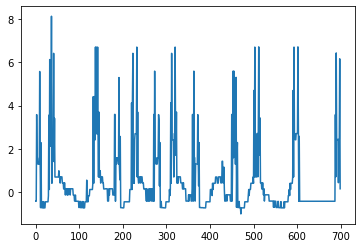

In [148]:
plt.plot(x[12500:13200])

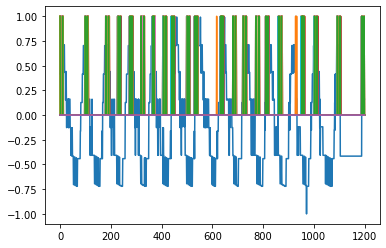

In [165]:
for i in range(25):
    plt.plot(data_dict["SMAP"]["test"][12000:13200,i])

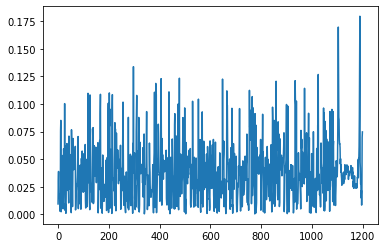

In [168]:
# for i in range(25):
    plt.plot(od.saliency_map(data_dict["SMAP"]["test"][12000:13200,0]))

In [136]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
od.infer_threshold(x, threshold_perc=90)
preds = od.predict(
    x.reshape(-1,1),
    return_instance_score=True
)
prediction = preds["data"]["is_outlier"]
print(f1_score(y, prediction), recall_score(y, prediction))

0.12739846908411828 0.11350007313149042


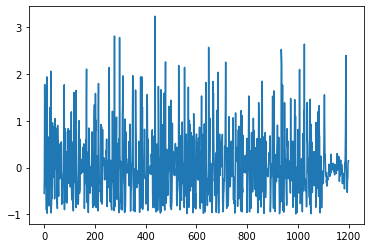

In [170]:
pred = od.predict(data_dict["SMAP"]["test"][12000:13200, 0], return_instance_score=True)
score = pred["data"]["instance_score"]
plt.plot(score)

In [172]:
a = np.random.randn(3,4)
b = np.random.randn(3,1)

In [175]:
np.hstack([a,b])

array([[-0.44863155,  0.48954591, -0.51656386, -0.24428562,  0.02824845],
       [ 0.95935981,  2.97071184, -0.53513285,  0.58627994,  0.73206677],
       [ 0.30520145, -0.62578412, -1.5930787 ,  1.05764286, -2.14586576]])